<a href="https://colab.research.google.com/github/TosinFrancis/DNN-NOTEBOOK/blob/main/DEEP_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/BankChurners.csv')
pd.set_option('display.max_columns', None)
# data.drop(['CLIENTNUM', 'Income_Category',
#            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
#        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
#        axis = 1, inplace = True)
data.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [ ]:
data.dropna(inplace = True)
print(f'dataframe rows: {data.shape[0]} \ndataframe columns: {data.shape[1]} \n')

cats = data.select_dtypes(include = ['object', 'category'])
nums = data.select_dtypes(include = 'number')

display(cats.head(3))
display(nums.head(3))

dataframe rows: 10127 
dataframe columns: 23 



,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [ ]:
# Transform the dataset to a Machine-Readeable Language

frame = data.copy()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in cats:
  frame[i] = encoder.fit_transform(frame[i])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in nums:
  frame[[i]] = scaler.fit_transform(frame[[i]])

print(f"Transformed Dataset")
display(frame.head())

y = frame.Attrition_Flag
x = frame.drop(['Attrition_Flag'], axis = 1)

Transformed Dataset


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0.802878,1,-0.165406,1,0.503368,3,1,2,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,-0.437754,0.437763
1,2.156861,1,0.333570,0,2.043199,2,2,4,0,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-0.437854,0.437845
2,-0.682769,1,0.583058,1,0.503368,2,1,3,0,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,-0.437952,0.437955
3,0.832862,1,-0.789126,0,1.273283,3,3,4,0,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.437644,0.437654
4,-0.814896,1,-0.789126,1,0.503368,5,1,2,0,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-0.437950,0.437955


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

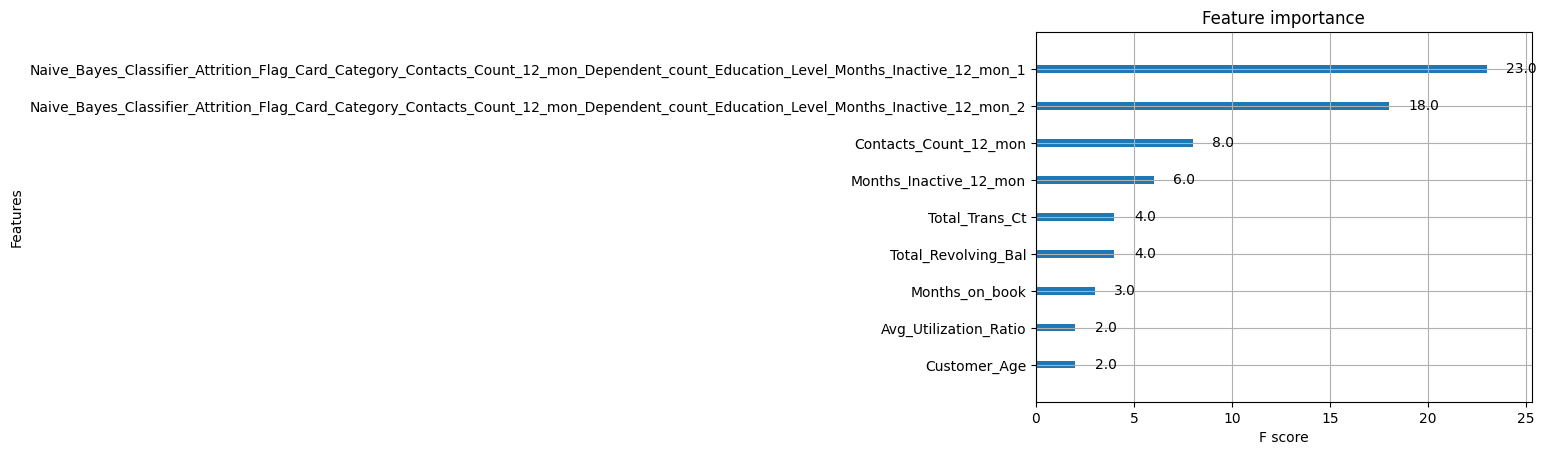

In [ ]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [ ]:
# ANOVA F-value between label/feature
from sklearn.feature_selection import SelectKBest, chi2, f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 15)
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(20, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
20,Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...,4.518525e+08
21,Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...,4.518463e+08
17,Total_Trans_Ct,1.620122e+03
18,Total_Ct_Chng_Q4_Q1,9.300784e+02
13,Total_Revolving_Bal,7.527024e+02
11,Contacts_Count_12_mon,4.418681e+02
19,Avg_Utilization_Ratio,3.328768e+02
16,Total_Trans_Amt,2.962277e+02
10,Months_Inactive_12_mon,2.409104e+02
9,Total_Relationship_Count,2.330729e+02


In [ ]:
sel_features = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal',
       'Contacts_Count_12_mon', 'Avg_Utilization_Ratio',
       'Total_Trans_Amt', 'Months_Inactive_12_mon',
       'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Gender',
       'Credit_Limit', 'Dependent_count']

new_frame = x[sel_features] #................................................... Turn the selected features to a dataframe
new_frame.head() #.............................................................. Display the selected features

,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Contacts_Count_12_mon,Avg_Utilization_Ratio,Total_Trans_Amt,Months_Inactive_12_mon,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Gender,Credit_Limit,Dependent_count
0,-0.973895,3.834003,-0.473422,0.492404,-0.775882,-0.959707,-1.327136,0.763943,2.623494,1,0.446622,0.503368
1,-1.357340,12.608573,-0.366667,-0.411616,-0.616276,-0.916433,-1.327136,1.407306,3.563293,0,-0.041367,2.043199
2,-1.911206,6.807864,-1.426858,-2.219655,-0.997155,-0.740982,-1.327136,0.120579,8.367214,1,-0.573698,0.503368
3,-1.911206,6.807864,1.661686,-1.315636,1.759686,-0.951758,1.641478,-0.522785,2.942843,0,-0.585251,1.273283
4,-1.570365,7.509325,-1.426858,-2.219655,-0.997155,-1.056263,-1.327136,0.763943,6.455682,1,-0.430877,0.503368


In [ ]:
# - split into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(new_frame, y, test_size = 0.15, random_state = 47, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (8607, 12)
x_test: (1520, 12)
y_train: (8607,)
y_test: (1520,)


In [ ]:
model = tf.keras.Sequential([ #........................ Instantiate the model creating class.
    tf.keras.layers.Dense(units=12, activation='relu'), #... Input layer of 12 features
    tf.keras.layers.Dense(20, activation='relu'), #.... Add the second 20 layer, and instantiate the activation to be used.
    tf.keras.layers.Dense(15, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(1, activation='sigmoid') #... Add the last output layer
])
model.compile(optimizer='adam', # ..................... The optimizer that adjusts weight and bias for a given neuron
              loss = 'binary_crossentropy', #...... Loss calculates the error of the prediction
              metrics=['accuracy']) #.................. Accuracy calculates the precision of the prediction.

model.fit(x_train, y_train, epochs=20) #..... Fit the model on the dataset and define the number of epochs

Epoch 1/20
269/269 [==============================] - 4s 5ms/step - loss: 0.4083 - accuracy: 0.8397
Epoch 2/20
269/269 [==============================] - 1s 4ms/step - loss: 0.2656 - accuracy: 0.8981
Epoch 3/20
269/269 [==============================] - 1s 2ms/step - loss: 0.2320 - accuracy: 0.9064
Epoch 4/20
269/269 [==============================] - 1s 2ms/step - loss: 0.2138 - accuracy: 0.9145
Epoch 5/20
269/269 [==============================] - 1s 2ms/step - loss: 0.2009 - accuracy: 0.9194
Epoch 6/20
269/269 [==============================] - 1s 3ms/step - loss: 0.1911 - accuracy: 0.9210
Epoch 7/20
269/269 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9251
Epoch 8/20
269/269 [==============================] - 1s 2ms/step - loss: 0.1773 - accuracy: 0.9270
Epoch 9/20
269/269 [==============================] - 1s 2ms/step - loss: 0.1714 - accuracy: 0.9298
Epoch 10/20
269/269 [==============================] - 1s 2ms/step - loss: 0.1685 - accuracy: 0.9321

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


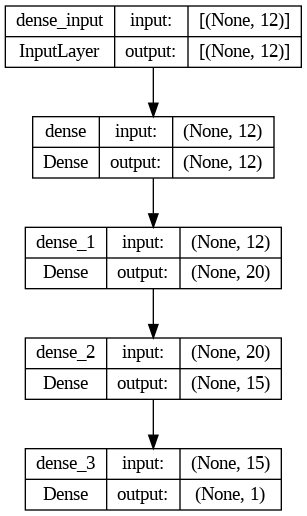

In [ ]:
#Saving created neural network
model.save("neural_network_model.h5")

from tensorflow.keras.utils import plot_model
plot_model(model,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  #............................................... set a 50% confidence level that the customer doesnt stop buying
outcome = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
outcome

48/48 [==============================] - 1s 8ms/step


,Actual,Predicted
3137,1,1
8335,1,1
9265,1,1
4276,1,1
4967,1,1
...,...,...
7012,1,1
5026,1,1
2107,1,1
10107,0,1


<Axes: xlabel='Attrition_Flag', ylabel='count'>

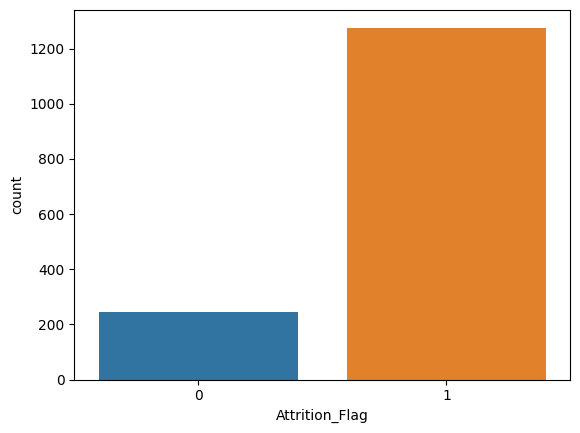

In [ ]:
sns.countplot(x = y_test)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       235
           1       0.96      0.96      0.96      1285

    accuracy                           0.93      1520
   macro avg       0.87      0.88      0.88      1520
weighted avg       0.94      0.93      0.94      1520



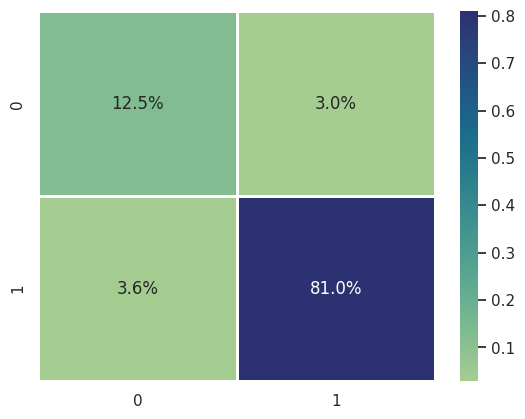

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

revealer = confusion_matrix(y_pred, y_test)
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

print(classification_report(y_pred, y_test))